Homework 4: Sentiment Analysis - Task 2
----

Names 
----
Names: __Jalen Wu, Jonathan Zhang__ 

Task 2: Train a Naive Bayes Model (30 points)
----

Using `nltk`'s `NaiveBayesClassifier` class, train a Naive Bayes classifier using a Bag of Words as features.

Learn more about Naive Bayes here: https://www.nltk.org/_modules/nltk/classify/naivebayes.html 

Naive Bayes classifiers use Bayes’ theorem for predictions. Naive Bayes can be a good baseline for NLP applications in particular. You can use it as a baseline for your project!

**

**10 points in Task 5 will be allocated for all 9 graphs (including the one generated here in Task 4 for Naive Bayes Classifier) being:**
- Legible
- Present below
- Properly labeled
     - x and y axes labeled
     - Legend for accuracy measures plotted
     - Plot Title with which model and run number the graph represents

In [1]:
# our utility functions
# RESTART your jupyter notebook kernel if you make changes to this file
import sentiment_utils as sutils

# nltk for Naive Bayes and metrics
import nltk
import nltk.classify.util
from nltk.metrics.scores import (precision, recall, f_measure, accuracy)
from nltk.classify import NaiveBayesClassifier

# some potentially helpful data structures from collections
from collections import defaultdict, Counter

# so that we can make plots
import matplotlib.pyplot as plt
# if you want to use seaborn to make plots
# import seaborn as sns

[nltk_data] Downloading package punkt to /Users/jalenwu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

In [3]:
# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook

# Generates a list of tuples from each file. Each tuple is a tokenized sentence.
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)
train_tokens, train_labels = train_tups
dev_tokens, dev_labels = dev_tups

In [4]:
print(train_tups[0][1])
print(train_tups[1][1])

['Its', 'spelled', 'S-L-A-S-H-E-R-S', '.', 'I', 'was', 'happy', 'when', 'the', 'main', 'character', 'flashed', 'her', 'boobs', '.', 'That', 'was', 'pretty', 'tight', '.', 'Before', 'and', 'after', 'that', 'the', 'movie', 'pretty', 'much', 'blows', '.', 'The', 'acting', 'is', 'like', 'E-list', 'and', 'it', "'s", 'shown', 'well', 'in', 'the', 'movie', '.', 'Not', 'to', 'mention', 'it', 'is', 'so', 'low', 'budget', 'that', 'Preacherman', 'and', 'Chainsaw', 'Charlie', 'are', 'played', 'by', 'the', 'same', 'person', '.', 'The', 'whole', 'movie', 'looks', 'like', 'it', 'was', 'shot', 'with', 'a', 'camcorder', 'instead', 'of', 'half', 'way', 'decent', 'film', '.', 'The', 'only', 'other', 'reason', 'I', 'liked', 'the', 'movie', 'was', 'because', 'Chainsaw', 'Charlie', 'and', 'Doctor', 'Ripper', 'were', 'funny', '.', 'They', 'said', 'many', 'stupid', 'things', 'that', 'made', 'me', 'laugh', '.', 'Other', 'than', 'that', 'if', 'you', 'see', 'this', 'movie', 'at', 'Blockbuster', 'do', 'everyone',

In [5]:
# set up a sentiment classifier using NLTK's NaiveBayesClassifier and 
# a bag of words as features
# take a look at the function in lecture notebook 7 (feel free to copy + paste that function)
# the nltk classifier expects a dictionary of features as input where the key is the feature name
# and the value is the feature value

# need to return a dict to work with the NLTK classifier
# Possible problem for students: evaluate the difference 
# between using binarized features and using counts (non binarized features)

def word_feats(words, binarized=False) -> dict:
    """
    This function converts a list of words so that they are featurized
    for nltk's format for bag-of-words
    """
    if binarized:
        return dict([(word, True) for word in words])
    else:
        return dict(Counter(words))


feature_list = []
for toks, label in zip(*train_tups):
    feature_list.append((word_feats(toks), label))

dev_list = []
for toks, label in zip(*dev_tups):
    dev_list.append((word_feats(toks), label))

# set up & train a sentiment classifier using NLTK's NaiveBayesClassifier and
# classify the first example in the dev set as an example
# make sure your output is well-labeled
# test to make sure that you can train the classifier and use it to classify a new example
classifier = NaiveBayesClassifier.train(feature_list)
test_featureset = word_feats(dev_tokens[0])

print("NB classifier prediction:", classifier.classify(test_featureset))
print("Actual label:", dev_labels[0])

NB classifier prediction: 0
Actual label: 0


In [6]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)
    
# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# NOTE : make sure one of your experiments uses 10% of the data, you will need this to answer the first question in task 5
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels

training_data = []
for i in range(1, 11):
    end_index = int(len(train_tokens) * i / 10)
    training_data.append((train_tokens[:end_index], train_labels[:end_index]))


eval_data = []

i = 1
for d in training_data: # for each entry in the subset.
    nbc = NaiveBayesClassifier.train([(word_feats(toks), label) for toks, label in zip(*d)])
    temp_dev_tokens = dev_tokens[:len(d[0])] # sentences in the dev set.
    preds = []
    temp_labels = []
    for toks in range(len(temp_dev_tokens)): # sentence
        feats = word_feats(temp_dev_tokens[toks])
        preds.append(nbc.classify(feats)) # classify the sentence based on its featurized words.
        actual_label = dev_labels[toks]
        temp_labels.append(actual_label)
    
    pred_indices = [x for x in range(len(preds)) if preds[x] == 1]
    label_indices = [y for y in range(len(temp_labels)) if temp_labels[y] == 1]
        
    temp_precision = precision(set(pred_indices), set(label_indices)) # actual labels vs. predicted labels
    temp_recall = recall(set(pred_indices), set(label_indices))
    temp_f1 = f_measure(set(pred_indices), set(label_indices))
    temp_accuracy = accuracy(temp_labels, preds)
    
    prfa = tuple([temp_precision, temp_recall, temp_f1, temp_accuracy])
    print(f"PRFA Scores for {i * 10}% of training set: ", prfa)
    i += 1
    eval_data.append(prfa)

PRFA Scores for 10% of training set:  (0.26436781609195403, 0.7931034482758621, 0.396551724137931, 0.5625)
PRFA Scores for 20% of training set:  (0.3523809523809524, 0.9024390243902439, 0.5068493150684932, 0.64)
PRFA Scores for 30% of training set:  (0.41904761904761906, 0.8461538461538461, 0.5605095541401274, 0.655)
PRFA Scores for 40% of training set:  (0.6, 0.9, 0.72, 0.755)
PRFA Scores for 50% of training set:  (0.6761904761904762, 0.8765432098765432, 0.7634408602150538, 0.78)
PRFA Scores for 60% of training set:  (0.7142857142857143, 0.8823529411764706, 0.7894736842105263, 0.8)
PRFA Scores for 70% of training set:  (0.7428571428571429, 0.8666666666666667, 0.8, 0.805)
PRFA Scores for 80% of training set:  (0.6857142857142857, 0.8780487804878049, 0.7700534759358288, 0.785)
PRFA Scores for 90% of training set:  (0.6952380952380952, 0.8690476190476191, 0.7724867724867724, 0.785)
PRFA Scores for 100% of training set:  (0.7333333333333333, 0.8850574712643678, 0.8020833333333334, 0.81)


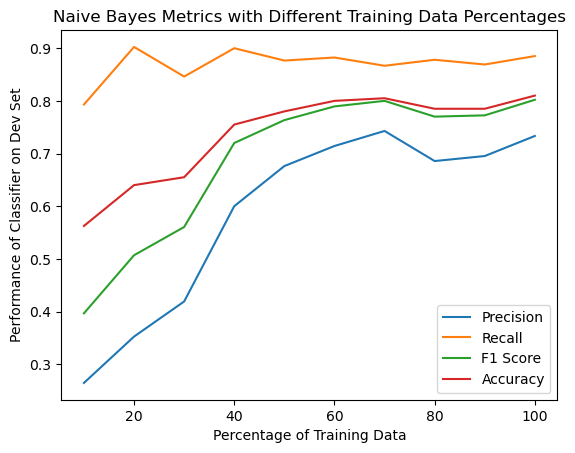

In [7]:
# x-axis: percentage of training data
# y-axis: performance of the classifier on the dev set
# 4 lines: precision, recall, f1, accuracy

plt.plot([i for i in range(10, 101, 10)], [x[0] for x in eval_data], label="Precision")
plt.plot([i for i in range(10, 101, 10)], [x[1] for x in eval_data], label="Recall")
plt.plot([i for i in range(10, 101, 10)], [x[2] for x in eval_data], label="F1 Score")
plt.plot([i for i in range(10, 101, 10)], [x[3] for x in eval_data], label="Accuracy")

plt.legend()

plt.xlabel("Percentage of Training Data")
plt.ylabel("Performance of Classifier on Dev Set")
plt.title("Naive Bayes Metrics with Different Training Data Percentages")
plt.show()

Test your model using both a __binarized__ (bag of words representation where we put 1 [true] if the word is there and 0 [false] otherwise) and a __multinomial__ (bag of words representation where we put the count of the word if the word occurs, and 0 otherwise). Use whichever one gives you a better final f1 score on the dev set to produce your graphs.

- f1 score binarized: __0.8061224489795918__
- f1 score multinomial: __0.8020833333333334__

# Binarized:

PRFA Scores for 10% of training set:  (0.19540229885057472, 0.85, 0.31775700934579443, 0.54375)

PRFA Scores for 20% of training set:  (0.29523809523809524, 0.9393939393939394, 0.44927536231884063, 0.62)

PRFA Scores for 30% of training set:  (0.4666666666666667, 0.9074074074074074, 0.6163522012578617, 0.695)

PRFA Scores for 40% of training set:  (0.6476190476190476, 0.9315068493150684, 0.7640449438202248, 0.79)

PRFA Scores for 50% of training set:  (0.7238095238095238, 0.9382716049382716, 0.8172043010752688, 0.83)

PRFA Scores for 60% of training set:  (0.7428571428571429, 0.8863636363636364, 0.8082901554404145, 0.815)

PRFA Scores for 70% of training set:  (0.7523809523809524, 0.8315789473684211, 0.7899999999999999, 0.79)

PRFA Scores for 80% of training set:  (0.7523809523809524, 0.8777777777777778, 0.8102564102564103, 0.815)

PRFA Scores for 90% of training set:  (0.7428571428571429, 0.8666666666666667, 0.8, 0.805)

PRFA Scores for 100% of training set:  (0.7523809523809524, 0.8681318681318682, 0.8061224489795918, 0.81)

# Multinomial 

PRFA Scores for 10% of training set:  (0.26436781609195403, 0.7931034482758621, 0.396551724137931, 0.5625)

PRFA Scores for 20% of training set:  (0.3523809523809524, 0.9024390243902439, 0.5068493150684932, 0.64)

PRFA Scores for 30% of training set:  (0.41904761904761906, 0.8461538461538461, 0.5605095541401274, 0.655)

PRFA Scores for 40% of training set:  (0.6, 0.9, 0.72, 0.755)

PRFA Scores for 50% of training set:  (0.6761904761904762, 0.8765432098765432, 0.7634408602150538, 0.78)

PRFA Scores for 60% of training set:  (0.7142857142857143, 0.8823529411764706, 0.7894736842105263, 0.8)

PRFA Scores for 70% of training set:  (0.7428571428571429, 0.8666666666666667, 0.8, 0.805)

PRFA Scores for 80% of training set:  (0.6857142857142857, 0.8780487804878049, 0.7700534759358288, 0.785)

PRFA Scores for 90% of training set:  (0.6952380952380952, 0.8690476190476191, 0.7724867724867724, 0.785)

PRFA Scores for 100% of training set:  (0.7333333333333333, 0.8850574712643678, 0.8020833333333334, 0.81)